In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
cd drive/My Drive/yolo

/content/drive/My Drive/yolo


In [ ]:
ls

'Copy of coco.names'  'Copy of yolov4.cfg'       download.jpg
'Copy of image.jpg'   'Copy of yolov4.weights'


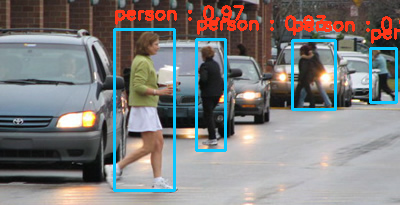

In [ ]:
import cv2
import time
import numpy as np
from google.colab.patches import cv2_imshow

confidence = 0.6
Nms= 0.3
class_names = []
with open("Copy of coco.names", "r") as f:
  class_names = [cname.strip() for cname in f.readlines()]
img = cv2.imread("photo1.jpg")
arc = cv2.dnn.readNet("Copy of yolov4.weights","Copy of yolov4.cfg")
arc.setPreferableBackend(cv2.dnn.DNN_BACKEND_CUDA)
arc.setPreferableTarget(cv2.dnn.DNN_TARGET_CUDA_FP16)
model = cv2.dnn_DetectionModel(arc)
model.setInputParams(size=(640,640), scale=1/255, swapRB=True)
x =time.time()
classes, scores, boxes = model.detect(img, confidence, Nms)

for (classid, score, box) in zip(classes, scores, boxes):
  if classid == 0:  # 0 is the index of the person class in the coco.names file
    label = "%s : %.2f" % (class_names[classid],score)
    cv2.rectangle(img,box,color=(255, 200, 10),thickness=2)
    cv2.putText(img, label, (box[0],box[1]-10),cv2.FONT_HERSHEY_SIMPLEX,0.6,(25,55,255),2)
  else:
    continue

cv2_imshow(img)

# Keshav Garg
# SE20UCSE065

